# Assignment 2


#### 1. 复习上课内容以及复现课程代码

## <font color=red>请查看file中Lecture2coding.ipynb</font>

#### 2. 回答以下理论题目

###       < 评阅点 >： 答案是否正确完整

###### 2.1 What conditions are required to make the BFS return the optimal solution ?

<center><font color=red>a. All costs between two nodes are positive or zero</font></center>

<center><font color=red>b. Sort the list used to maintain the searching history in every iteration</font></center>

##### 2.2 Is there a way to make DFS find the optimal solution ? (You may need to read some material about iterative DFS)

<center><font color=red>Search the solution by using DFS, and compare the cost to other solution using by DFC, the smallest cost is te optimal solution.</font></center>

##### 2.3 In what conditions BFS is a better choice than DFS and vice versa ?

<center><font color=red>a.If the usage of memory is low, we prefer to use DFS.</font></center>
<center><font color=red>b.To find out the optimal solution, we prefer to use BFS.</font></center>

##### 2.4 When can we use machine learning ?

<center><font color = red>The main purpose of machine learning is to allow computers to learn automatically and focused on the algorithm which can analyst the past data and predict the new data.</font></center>

##### 2.5 What is the gradient of a function ?

<center><font color=red>To calculate the optimal solution of a function.</font></center>

##### 2.6 How can we find the maximum value of a function using the information of gradient ?

$$ X = X_1 +\alpha\frac{\Delta x}{\Delta y}$$

#### 3. 实践部分  寻找地铁路线

### < 评阅点 >  1: 爬虫爬取数据是否完整;  2:搜索算法是否正确

In this part, although we recommend you to use Beijing subway, you still can use the subway map of any cities that you are interested in. 

![title](img/ditu.png)

Please using the search policy to implement an agent. This agent receives two input, one is @param start station and the other is @param destination. Your agent should give the optimal route based on Beijing Subway system.

Deadline: 2019-October-27

#### Procedures

#### 1. Get data from web.  

Some tips: 

a. You might need this package: requests[https://2.python-requests.org/en/master/] to get webpages

b.You might need to use Regular Expression and Beautiful Soap package to parse the webpages

In [1]:
WH_SUBWAY_FILE = './wh_subway.json'

In [2]:
import json
import requests

def saveWhSubwayData():
    URL = 'http://map.amap.com/service/subway?_1572316356716&srhdata=4201_drw_wuhan.json'
    
    resp = requests.get(URL)
    assert resp.status_code == 200
    
    whData = bytes.decode(resp.content)

    with open(WH_SUBWAY_FILE, 'w+') as f:
        f.write(whData)
        
    return whData
    

In [3]:
saveWhSubwayData()

'{"s":"武汉市地铁","i":"4201","l":[{"st":[{"rs":"1361 47","udpx":"1362 48;1359 46","su":"1","udsu":"1;1","n":"汉口北","sid":"420100034364030","p":"1361 47","r":"420100034364","udsi":"420100034364030;420100034365002","t":"0","si":"420100034364030","sl":"114.329481,30.711953","udli":"420100034364;420100034365","poiid":"BV10060938","lg":"2","sp":"han kou bei"},{"rs":"1326 82","udpx":"1328 83;1325 81","su":"1","udsu":"1;1","n":"滠口新城","sid":"420100034364029","p":"1326 82","r":"420100034364","udsi":"420100034364029;420100034365003","t":"0","si":"420100034364029","sl":"114.342372,30.684553","udli":"420100034364;420100034365","poiid":"BV10060937","lg":"2","sp":"she kou xin cheng"},{"rs":"1292 117","udpx":"1293 118;1291 116","su":"1","udsu":"1;1","n":"滕子岗","sid":"420100034364028","p":"1292 117","r":"420100034364","udsi":"420100034364028;420100034365004","t":"0","si":"420100034364028","sl":"114.341474,30.674527","udli":"420100034364;420100034365","poiid":"BV10060936","lg":"2","sp":"teng zi gang"},{"rs":

##### 2. Preprocessing data

Some tips:

a. Find a suitable way to save the data you get from the web. (Note: The way you use to save the data should be able to be used to create the graph that your agent is going to explore)

In [4]:
stationLocation = {}

In [5]:
import networkx as nx

def buildSubwayGraph(filepath):
    with open(filepath) as f:
        dataStr = f.read()
    subwayJson = json.loads(dataStr)
    graph = nx.Graph()
    
    for line in subwayJson['l']:
        subwayLine = {}
        
#         subwayLine['line_code'] = line['ls']  # 线路编码
#         subwayLine['line_name'] = line['ln']  # 线路名称
#         subwayLine['is_loop'] = line['lo']  # 是否环线
#         subwayLine['aviable'] = line['su']  # 是否可用
#         subwayLine['stations'] = []
        lineCode = line['ls']  # 线路编码
        lineName = line['ln']  # 线路名称
        isLoop = line['lo']  # 是否环线
        aviable = line['su']  # 是否可用
        stations = []
        
        if aviable != '1' : continue
        
        above = None
        for i, station in enumerate(line['st']):
            geo = tuple(map(float, station['sl'].split(',')))
            name = station['n']
            stationLocation[name] = geo
            
            item = {
                'name': name,  # 站点名称
                'poiid': station['poiid'],  # 站点编码
                'geo': geo,  # (经度, 纬度)
                'transfer': station['t'],
                'aviable': station['su'],
                'route': set(station['r'].split('|')),
                'lineCode': lineCode,
                'lineName': lineName
            }
            stations.append(item) 
            
            graph.add_node(item['name'], **item)
            #print(i,graph.nodes[item['name']])
            
            if not above:
                above = item['name']
                continue
            
            distance = 1
            graph.add_edge(item['name'], above, 
                           distance = distance, line_name=lineName)
            above = item['name']
        
        if isLoop == '1':
            begin = stations[0]
            end = stations[-1]
            distance = 1
            graph.add_edge(begin, end, 
                           distance = distance, line_name=lineName)
        
    return graph

{'青年路': {'distance': 1, 'line_name': '2号线'}, '范湖': {'distance': 1, 'line_name': '2号线'}, '武汉商务区': {'distance': 1, 'line_name': '7号线'}, '取水楼': {'distance': 1, 'line_name': '7号线'}}
{'name': '王家墩东', 'poiid': 'BV10060905', 'geo': (114.263288, 30.594245), 'transfer': '1', 'aviable': '1', 'route': {'420100024404', '900000044148'}, 'lineCode': '900000044148', 'lineName': '7号线'}


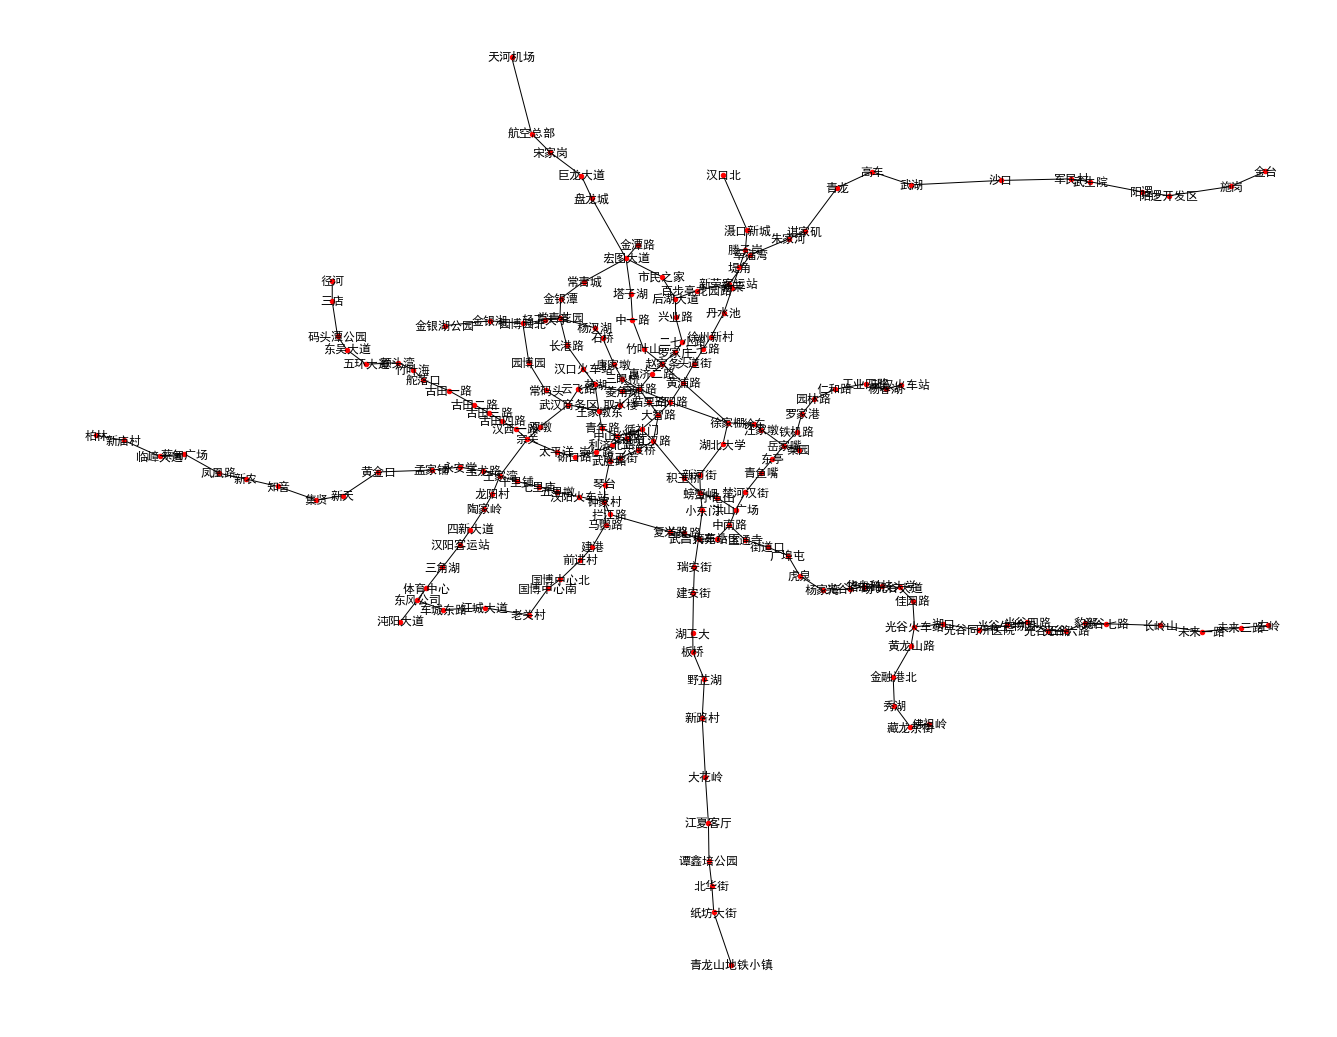

In [59]:
graph = buildSubwayGraph(WH_SUBWAY_FILE)
print(graph['王家墩东'])
print(graph.nodes['王家墩东'])

import networkx as nx
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize = (18, 14))
nx.draw(graph, stationLocation, with_labels=True, node_size = 20)

#### 3. Build the search agent

Build the search agent based ont he graph you built.

for example, if you use Beijing subway graoh, and you run:

\>>> search("奥体中心“，”天安门“）

You should get the result as follows: 奥体中心 -> A ->B ->C ... -> 天安门

In [52]:
def search_BFS(graph,start,destination):
    pathes = [[start]]
    visited = set()
    
    while pathes:
        path = pathes.pop(0)
        froniter = path[-1]
        
        if froniter in visited: continue
            
        successsors = graph[froniter]
        
        for city in successsors:
            if city in path: continue  # check loop
            
            new_path = path+[city]
            
            pathes.append(new_path)  #bfs
            #pathes = [new_path] + pathes #dfs
            
            if city == destination:
                return new_path
        visited.add(froniter)

In [53]:
" -> ".join(search_BFS(graph, '汉口北', '佛祖岭'))

'汉口北 -> 滠口新城 -> 滕子岗 -> 堤角 -> 新荣 -> 丹水池 -> 徐州新村 -> 二七路 -> 头道街 -> 黄浦路 -> 徐家棚 -> 湖北大学 -> 新河街 -> 螃蟹岬 -> 小龟山 -> 洪山广场 -> 中南路 -> 宝通寺 -> 街道口 -> 广埠屯 -> 虎泉 -> 杨家湾 -> 光谷广场 -> 珞雄路 -> 华中科技大学 -> 光谷大道 -> 佳园路 -> 光谷火车站 -> 黄龙山路 -> 金融港北 -> 秀湖 -> 藏龙东街 -> 佛祖岭'

### (Optional) Improve your agent to make it able to find a path based on different strategies

###  <评阅点> : 是否正确得到不同目标下的路径。

Some ideas you might want to try:

a. Find the shortest path between two stations.

b. Find the path that requires minimum transfers between two stations.

c. Combine the previous two ideas, find a more suitable path.

Compare your results with results obtained by using some apps such as Baidu map, A map, Google map or Apple map. If there is difference, try to explanate it.

In [12]:
import math

def geo_distance(origin, destination):
    """
    Calculate the Haversine distance.

    Parameters
    ----------
    origin : tuple of float
        (lat, long)
    destination : tuple of float
        (lat, long)

    Returns
    -------
    distance_in_km : float

    Examples
    --------
    >>> origin = (48.1372, 11.5756)  # Munich
    >>> destination = (52.5186, 13.4083)  # Berlin
    >>> round(distance(origin, destination), 1)
    504.2
    """
    lat1, lon1 = origin
    lat2, lon2 = destination
    radius = 6371  # km

    dlat = math.radians(lat2 - lat1)
    dlon = math.radians(lon2 - lon1)
    a = (math.sin(dlat / 2) * math.sin(dlat / 2) +
         math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) *
         math.sin(dlon / 2) * math.sin(dlon / 2))
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    d = radius * c

    return d

In [54]:
def get_distance(city1,city2):
    return geo_distance(stationLocation[city1],stationLocation[city2])

print(get_distance('小龟山','洪山广场'))
print(get_distance('洪山广场','中南路'))
print(get_distance('宝通寺','街道口'))

1.125421484605934
0.5189030643338804
1.3781393723299982


In [55]:
def get_transfers(city1,city2):
    if graph.nodes[city1]['lineName'] == graph.nodes[city2]['lineName']:
        return 0 
    else:
        return 1


print(get_transfers('小龟山','洪山广场'))
print(get_transfers('洪山广场','中南路'))
print(get_transfers('宝通寺','街道口'))

1
0
0


In [56]:
def search_best(graph,start,destination,get_weight):
    pathes = [[0,start]]
    result = []
    weight = None
    while pathes:
        path = pathes.pop(0)
        froniter = path[-1]
        successsors = graph[froniter]
        
        for (city, v) in successsors.items():
            if city in path: continue  # check loop
            
            weight2 = path[0] + get_weight(froniter, city)
            if weight != None and weight2 >= weight: continue
            new_path = path + [city]
            new_path[0] = weight2
            if city == destination:
                weight = weight2
                result.append(new_path)
                break
            pathes.insert(0, new_path)  #dfs
        
    return result[-1][1:]

In [57]:
# shortest path
" -> ".join(search_best(graph, '汉口北', '佛祖岭', get_distance))

'汉口北 -> 滠口新城 -> 滕子岗 -> 堤角 -> 新荣 -> 丹水池 -> 徐州新村 -> 二七路 -> 头道街 -> 黄浦路 -> 三阳路 -> 大智路 -> 江汉路 -> 积玉桥 -> 螃蟹岬 -> 小龟山 -> 洪山广场 -> 中南路 -> 宝通寺 -> 街道口 -> 广埠屯 -> 虎泉 -> 杨家湾 -> 光谷广场 -> 珞雄路 -> 华中科技大学 -> 光谷大道 -> 佳园路 -> 光谷火车站 -> 黄龙山路 -> 金融港北 -> 秀湖 -> 藏龙东街 -> 佛祖岭'

In [58]:
# minimum transfers
" -> ".join(search_best(graph, '汉口北', '佛祖岭', get_transfers))

'汉口北 -> 滠口新城 -> 滕子岗 -> 堤角 -> 新荣 -> 丹水池 -> 徐州新村 -> 二七路 -> 头道街 -> 黄浦路 -> 徐家棚 -> 徐东 -> 汪家墩 -> 岳家嘴 -> 东亭 -> 青鱼嘴 -> 楚河汉街 -> 洪山广场 -> 中南路 -> 宝通寺 -> 街道口 -> 广埠屯 -> 虎泉 -> 杨家湾 -> 光谷广场 -> 珞雄路 -> 华中科技大学 -> 光谷大道 -> 佳园路 -> 光谷火车站 -> 黄龙山路 -> 金融港北 -> 秀湖 -> 藏龙东街 -> 佛祖岭'

## Congratulations ! You have finished the assignment of week 2.

![title](img/agent.png)

### If you have any suggestions regarding the teaching, please feel free to send them to my eamil (eric.lee.xiao@gmail.com) 